In [1]:
# 

In [1]:
#Example
import glob
import pandas as pd

In [2]:
mp = "yupi"
games = glob.glob(f"/data/iogames_data/PATH_SCREENSHOT/*{mp}")
print(f"Total games in {mp}",len(games))
for game in games:
    print("game:",game)
    images = glob.glob(f"{game}/*.png")
    print("Total images:", len(images))
    print(images)

Total games in yupi 19
game: /data/iogames_data/PATH_SCREENSHOT/bois.html_yupi
Total images: 5
['/data/iogames_data/PATH_SCREENSHOT/bois.html_yupi/4.png', '/data/iogames_data/PATH_SCREENSHOT/bois.html_yupi/3.png', '/data/iogames_data/PATH_SCREENSHOT/bois.html_yupi/2.png', '/data/iogames_data/PATH_SCREENSHOT/bois.html_yupi/0.png', '/data/iogames_data/PATH_SCREENSHOT/bois.html_yupi/1.png']
game: /data/iogames_data/PATH_SCREENSHOT/bowmaster-prelude.html_yupi
Total images: 5
['/data/iogames_data/PATH_SCREENSHOT/bowmaster-prelude.html_yupi/4.png', '/data/iogames_data/PATH_SCREENSHOT/bowmaster-prelude.html_yupi/3.png', '/data/iogames_data/PATH_SCREENSHOT/bowmaster-prelude.html_yupi/2.png', '/data/iogames_data/PATH_SCREENSHOT/bowmaster-prelude.html_yupi/0.png', '/data/iogames_data/PATH_SCREENSHOT/bowmaster-prelude.html_yupi/1.png']
game: /data/iogames_data/PATH_SCREENSHOT/basketball-legends.html_yupi
Total images: 5
['/data/iogames_data/PATH_SCREENSHOT/basketball-legends.html_yupi/4.png', '/d

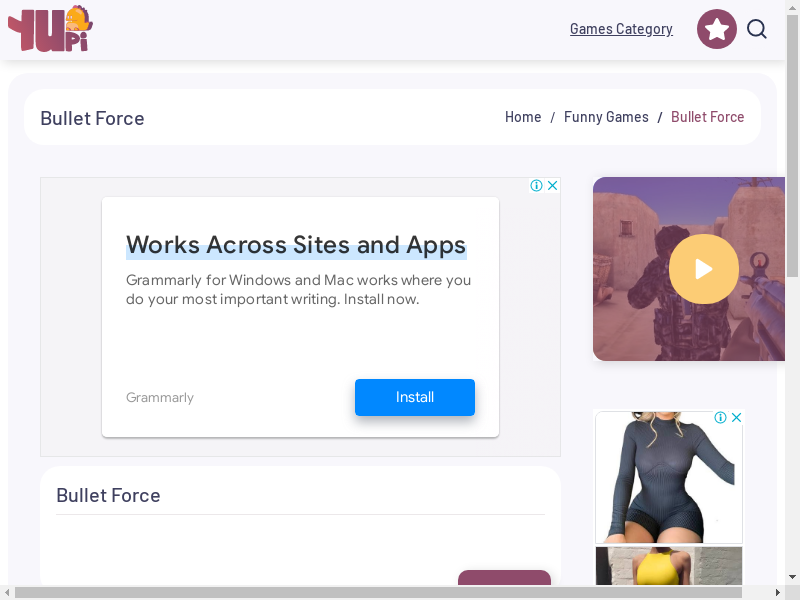

In [3]:
from PIL import Image
im = Image.open('/data/iogames_data/PATH_SCREENSHOT/bullet-force.html_yupi/4.png')
display(im)

In [4]:
import opennsfw2 as n2

# To get the NSFW probability of a single image.
# image_path = "/data/iogames_data/PATH_SCREENSHOT/funny-bunny-logic_crazygames_iframe/11.png"

# nsfw_probability = n2.predict_image(image_path)
# nsfw_probability

# # To get the NSFW probabilities of a list of images.
# # This is better than looping with `predict_image` as the model will only be instantiated once
# # and batching is used during inference.
image_paths = ['/data/iogames_data/PATH_SCREENSHOT/bullet-force.html_yupi/4.png', '/data/iogames_data/PATH_SCREENSHOT/bullet-force.html_yupi/3.png', '/data/iogames_data/PATH_SCREENSHOT/bullet-force.html_yupi/2.png', '/data/iogames_data/PATH_SCREENSHOT/bullet-force.html_yupi/0.png', '/data/iogames_data/PATH_SCREENSHOT/bullet-force.html_yupi/1.png']
nsfw_probabilities = n2.predict_images(image_paths)
nsfw_probabilities

[0.015425196848809719,
 0.015425196848809719,
 0.015425196848809719,
 0.015425196848809719,
 0.015425204299390316]

In [5]:
# driver code
# sometimes the images are zero in a game folder find a reason; discuss in the meeting
#longer loading time reduces the time of clicks hence less images
# what we call a nude image, score find paper

In [6]:
def append_dict_as_row(file_name, dict_of_elem):
    # Open file in append mode
    with open(file_name, 'a+', newline='') as write_obj:
        # Create a writer object from csv module
        dict_writer = DictWriter(write_obj, fieldnames=['mp','game','nsfw_scores'])
        # Add dictionary as wor in the csv
        dict_writer.writerow(dict_of_elem)

In [7]:
lst = ['yupi.io',
'yourgames.io',
'mousebreaker.com',
'bestgames.com',
'yad.com',
'babygames.com',
'iogame.app',
'friv.com',
'webgameapp.com',
'poki.com',
'gameflare.com',
'ufreegames.com',
'miniclip.com',
'coolmathgames.com',
'kibagames.com',
'spiels.at',
'addictinggames.com',
'crazygames.com',
'vseigru.net',
'fukgames.com',
'y8.com',
'itch.io']

In [8]:
import glob
import pandas as pd
import numpy as np
import opennsfw2 as n2
from PIL import Image
from csv import DictWriter
import tqdm

for l in lst:

    mp_full = l

    mp = mp_full.split(".",1)[0]

    games = glob.glob(f"/data/iogames_data/PATH_SCREENSHOT/*{mp}")
    print(f"Total games in {mp}:",len(games))
    print("**************************************************************************")
    L=[]
    for game in tqdm.tqdm(games):

        game_name= game.split("/",3)[-1].split("/",1)[1].split("_",1)[0]
#         print("game_path:",game)
        image_paths = glob.glob(f"{game}/*.png")
#         print("Total images:", len(image_paths))
        if len(image_paths)>=1:
            nsfw_probabilities = n2.predict_images(image_paths)
            append_dict_as_row("output_files/nsfw_results.csv", {"mp":mp_full,"game":game_name,"nsfw_scores":nsfw_probabilities})
        else:
            append_dict_as_row("output_files/nsfw_results.csv", {"mp":mp_full,"game":game_name,"nsfw_scores":'NO_IMAGE'})

Total games in yupi: 19
**************************************************************************


 16%|█▌        | 3/19 [00:08<00:43,  2.69s/it]

 21%|██        | 4/19 [00:10<00:39,  2.65s/it]

100%|██████████| 19/19 [00:51<00:00,  2.70s/it]


Total games in yourgames: 33
**************************************************************************


 88%|████████▊ | 29/33 [00:17<00:02,  1.65it/s]


KeyboardInterrupt: 

In [ ]:
pd.read_csv("nsfw_results/yupi.io.csv")

In [ ]:
import pandas as pd
df = pd.read_csv("nsfw_results/addictinggames.com.csv")
df

In [ ]:
eval(df['nsfw_scores'][2])

# manipulate results for the papar

In [9]:
import glob
import pandas as pd

In [10]:
files = glob.glob("nsfw_results/*.*")
files

['nsfw_results/itch.io.csv',
 'nsfw_results/kibagames.com.csv',
 'nsfw_results/miniclip.com.csv',
 'nsfw_results/babygames.com.csv',
 'nsfw_results/y8.com.csv',
 'nsfw_results/addictinggames.com.csv',
 'nsfw_results/coolmathgames.com.csv',
 'nsfw_results/yad.com.csv',
 'nsfw_results/crazygames.com.csv',
 'nsfw_results/ufreegames.com.csv',
 'nsfw_results/iogame.app.csv',
 'nsfw_results/vseigru.net.csv',
 'nsfw_results/friv.com.csv',
 'nsfw_results/webgameapp.com.csv',
 'nsfw_results/yourgames.io.csv',
 'nsfw_results/gameflare.com.csv',
 'nsfw_results/fukgames.com.csv',
 'nsfw_results/yupi.io.csv',
 'nsfw_results/bestgames.com.csv',
 'nsfw_results/poki.com.csv',
 'nsfw_results/mousebreaker.com.csv',
 'nsfw_results/spiels.at.csv']

In [11]:
x = 0
for file in files[1:]:
    try:
        print(file)
        df = pd.read_csv(file)
        print(df)
        x+=len(df)
    #     break
    except:
        pass
#     break

nsfw_results/kibagames.com.csv
                 mp                      game  \
0     kibagames.com  Bubble-Shooter-Halloween   
1     kibagames.com               Aquapark-io   
2     kibagames.com          Red-Ball-Forever   
3     kibagames.com             Super-Service   
4     kibagames.com      Baby-Hazel-Goes-Sick   
...             ...                       ...   
2203  kibagames.com      My-Fairytale-Unicorn   
2204  kibagames.com    Car-Driving-Stunt-Game   
2205  kibagames.com               Gold-Strike   
2206  kibagames.com                  Dominoes   
2207  kibagames.com                     Snake   

                                            nsfw_scores  
0     [0.037251073867082596, 0.037251073867082596, 0...  
1     [0.0189546849578619, 0.0189546849578619, 0.018...  
2     [0.02398489974439144, 0.02398489974439144, 0.0...  
3     [0.03853517770767212, 0.03853517770767212, 0.0...  
4     [0.022772638127207756, 0.022772638127207756, 0...  
...                             

               mp                                              game  \
0     vseigru.net   22735-igra-rozhdestvenskie-krestiki-noliki.html   
1     vseigru.net                 28066-igra-zapusk-zlogo-kota.html   
2     vseigru.net             18501-igra-zlaya-babushka-indiya.html   
3     vseigru.net  9461-igra-zvjozdnaya-podkova-pervye-skachki.html   
4     vseigru.net         18439-igra-svinka-peppa-na-operatsii.html   
...           ...                                               ...   
9639  vseigru.net                  19265-igra-veselaya-ferma-3.html   
9640  vseigru.net                      23630-igra-superspin-io.html   
9641  vseigru.net            28301-igra-pitstsa-nindzya-maniya.html   
9642  vseigru.net    24522-igra-test-snegovik-ty-anna-ili-elza.html   
9643  vseigru.net                     6277-igra-zapomni-tsvety.html   

                                            nsfw_scores  
0     [0.0011138423578813672, 0.0011138423578813672,...  
1     [0.014106959104537964, 0.

In [12]:
file

'nsfw_results/spiels.at.csv'

In [13]:
import numpy as np
L = []
for file in files[:]:
    try:
        mp = file.split("/",1)[1].split(".csv",1)[0]
        df = pd.read_csv(file)
        l = []
        for index, row in df.iterrows():
            try:
        #         print(np.median(eval(row['nsfw_scores'])))
                l.append(np.median(eval(row['nsfw_scores'])))
            except:
                pass
        d = {"mp":mp,"median_nsfw_score":np.median(l)}
        L.append(d)
    except:
        pass
pd.DataFrame(L)

,mp,median_nsfw_score
0,kibagames.com,0.027262
1,miniclip.com,0.007670
2,babygames.com,0.008898
3,y8.com,0.010252
4,addictinggames.com,0.008358
5,coolmathgames.com,0.020279
6,yad.com,0.002460
7,crazygames.com,0.019016
8,ufreegames.com,0.001619
9,iogame.app,0.006425


In [14]:
dff = pd.DataFrame(L)
dx = {"mp":'itch.io',"median_nsfw_score":0.005461}
dff.append(dx, ignore_index = True)
dff = dff.sort_values(by= 'median_nsfw_score',ascending = False)
dff

<ipython-input-14-07a26b490a3d>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dff.append(dx, ignore_index = True)


,mp,median_nsfw_score
0,kibagames.com,0.027262
12,webgameapp.com,0.020943
20,spiels.at,0.020445
5,coolmathgames.com,0.020279
7,crazygames.com,0.019016
15,fukgames.com,0.017047
16,yupi.io,0.014993
13,yourgames.io,0.014107
3,y8.com,0.010252
19,mousebreaker.com,0.009816


In [15]:
l = []
for i,r in dff.iterrows():
    print(r[0].split(".",1)[0])
    l.append(r[0].split(".",1)[0])
dff['trimmed'] = l   

kibagames
webgameapp
spiels
coolmathgames
crazygames
fukgames
yupi
yourgames
y8
mousebreaker
babygames
addictinggames
miniclip
friv
bestgames
poki
iogame
vseigru
yad
gameflare
ufreegames


In [16]:
list_of_games = dff['mp'].to_list()

<ipython-input-28-09001951aa5a>:28: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='black', linestyle='-',alpha = 0.4)


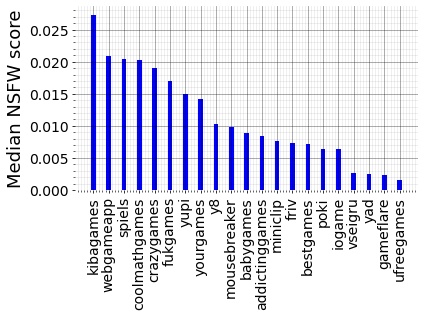

In [28]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(figsize =(6,4.5))

ax.bar(  dff["trimmed"], dff['median_nsfw_score'],color="blue", width=.3)


# ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29])
# ax.set_xticklabels(list_of_games, rotation=0)
# plt.gca().yaxis.set_major_formatter(PercentFormatter(100))

ax.set_ylabel("Median NSFW score", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=12)
# for bars in ax.containers:
#     ax.bar_label(bars)
    
# plt.legend(['#Games','#Unique games'], fontsize = 14,
#           loc="upper left", ncol=1,frameon = False,)


ax.tick_params(axis='x', direction='out', length=3, bottom = True)
ax.tick_params(axis='y', direction='out', length=3, left=True)


plt.grid()
plt.grid(b=True, which='major', color='black', linestyle='-',alpha = 0.4)
plt.grid(which='minor', color='black', alpha=0.08)
plt.minorticks_on()

plt.box(False)
# plt.yscale('log')
plt.xticks(fontsize=14, rotation = 90)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.savefig("/data/iogames_code/5_marketplace_metadata_analysis/output_plots/nsfw_results.pdf", bbox_inches='tight', pad_inches=0)
plt.box(False)
plt.tight_layout()
plt.show()